<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 2. Image Filtering

In [1]:
path0 = '<your path>'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [3]:
from PIL import ImageFilter
import scipy.signal as signal

### 2D Convolution

TIFF (512, 512) L


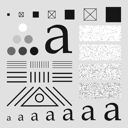

In [4]:
I = Image.open(path0+'testpattern512.tif')
print(I.format, I.size, I.mode)
I.resize((128,128))

- ImageFilter (PIL)

In [5]:
#I.filter(ImageFilter.Kernel((3,3),(1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9),1,0))

In [6]:
#I.filter(ImageFilter.Kernel((3,3),(1,1,1,1,-8,1,1,1,1),1,0))

In [7]:
#I.filter(ImageFilter.GaussianBlur(5))
#I.filter(ImageFilter.MedianFilter(5))
#I.filter(ImageFilter.MinFilter(5))
#I.filter(ImageFilter.MaxFilter(5))
#I.filter(ImageFilter.EDGE_ENHANCE)

- 2D convolution (scipy)

In [8]:
f = np.array(I)

In [9]:
w = np.array( [[1,1,1],[1,1,1],[1,1,1]] )
print(w)
print(w.size)
w = w/(w.size)
print(w)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
9
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [10]:
g = signal.convolve2d(f,w,mode='valid')
g.shape

(510, 510)

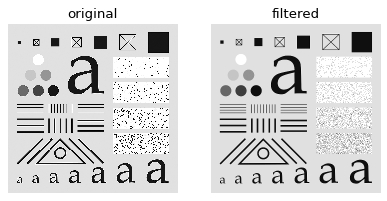

In [11]:
plt.figure(dpi=80)
plt.subplot(1,2,1)
plt.imshow(f,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(g,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('filtered')
plt.show()

- first-order derivatives

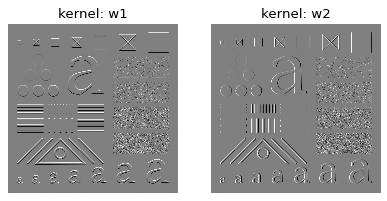

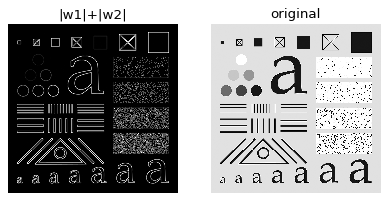

In [12]:
w1 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
w2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
g1 = signal.convolve2d(f,w1,mode='same')
g2 = signal.convolve2d(f,w2,mode='same')
plt.figure(dpi=80)
plt.subplot(1,2,1)
plt.imshow(g1,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('kernel: w1')
plt.subplot(1,2,2)
plt.imshow(g2,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('kernel: w2')
plt.show()

plt.figure(dpi=80)
plt.subplot(1,2,1)
plt.imshow(np.abs(g2)+np.abs(g1),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('|w1|+|w2|')
plt.subplot(1,2,2)
plt.imshow(f,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('original')
plt.show()

- shading correction using smoothing kernel

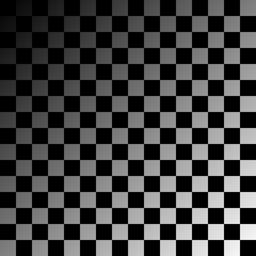

In [13]:
I = Image.open(path0+'checkerboard1024-shaded.tif')
I = I.resize((256,256))
I

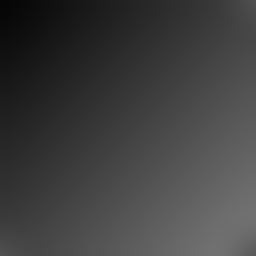

In [14]:
I.filter(ImageFilter.GaussianBlur(19))

In [15]:
f_shade = np.array(I.filter(ImageFilter.GaussianBlur(19)))
f = np.array(I)
f_corrected = f/f_shade

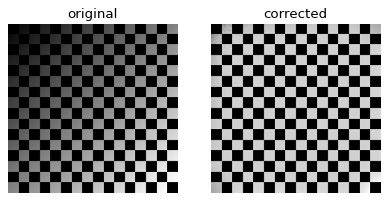

In [16]:
plt.figure(dpi=80)
plt.subplot(1,2,1)
plt.imshow(f,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(f_corrected,cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('corrected')
plt.show()

### Image Restoration

In [17]:
I = Image.open(path0+'test-pattern.tif')
print(I)
I = I.resize((256,256))

<PIL.TiffImagePlugin.TiffImageFile image mode=L size=604x604 at 0x7FE67C1F6438>


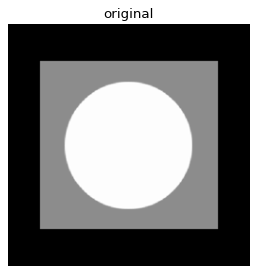

In [18]:
f = np.array(I)
plt.figure(dpi=80)
plt.imshow(f, cmap='gray', aspect = 'equal')
plt.axis('off')
plt.title('original')
plt.show()


- Gaussian Noise

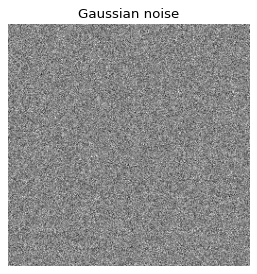

In [19]:
n_gauss = np.random.normal(0,16,(256,256))
plt.figure(dpi=80)
plt.imshow(n_gauss, cmap='gray', aspect = 'equal')
plt.axis('off')
plt.title('Gaussian noise')
plt.show()

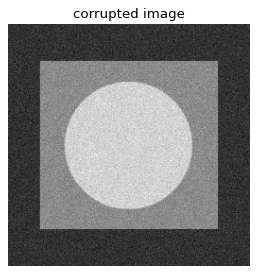

In [20]:
f_n = f + n_gauss
plt.figure(dpi=80)
plt.imshow(f_n,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('corrupted image')
plt.show()

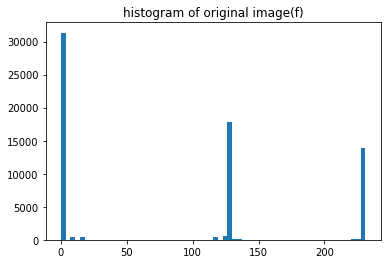

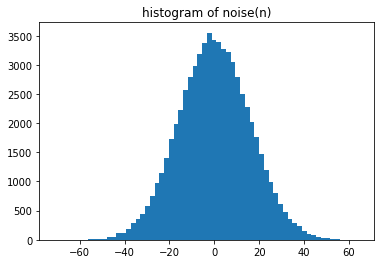

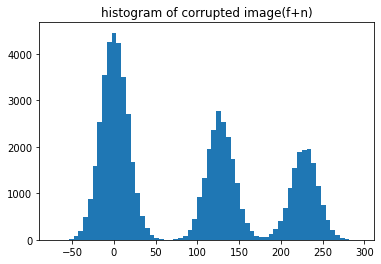

In [21]:
plt.hist(f.ravel(),64)
plt.title('histogram of original image(f)')
plt.show()
plt.hist(n_gauss.ravel(),64)
plt.title('histogram of noise(n)')
plt.show()
plt.hist(f_n.ravel(),64)
plt.title('histogram of corrupted image(f+n)')
plt.show()

- Salt and Pepper Noise

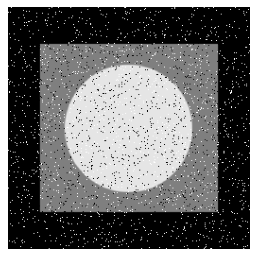

In [22]:
sp = np.random.randint(0,100,np.shape(f))
f_sp = f.copy()
f_sp[sp<3] = 0
f_sp[sp>96] = 255

plt.figure(dpi=80)
plt.imshow(f_sp,cmap='gray',aspect='equal')
plt.axis('off')
plt.show()

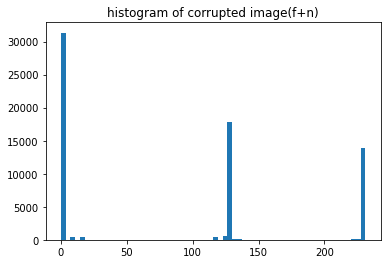

In [23]:
plt.hist(f.ravel(),64)
plt.title('histogram of corrupted image(f+n)')
plt.show()

### Median/Mean Filtering

In [24]:
SS = 5 # kernel size (square kernel)
ss = int((SS-1)/2)
r_median = np.zeros(np.shape(f_n))
r_mean = np.zeros(np.shape(f_n))

- Gaussian Noise

In [25]:
for x in range(ss,np.size(f_n,0)-ss):
  for y in range(ss,np.size(f_n,1)-ss):
    Sxy = f_n[x-ss:x-ss+SS,y-ss:y-ss+SS]    
    r_mean[x,y] = np.mean(Sxy)
    r_median[x,y] = np.median(Sxy)

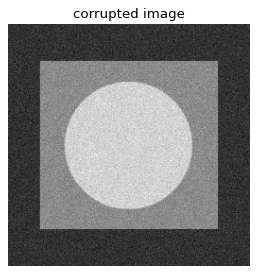

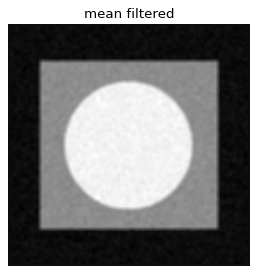

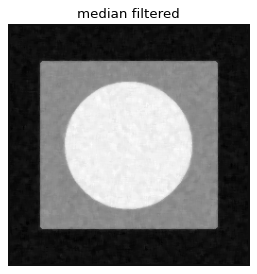

In [26]:
plt.figure(dpi=80)
plt.imshow(f_n,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('corrupted image')
plt.show()
plt.figure(dpi=80)
plt.imshow(r_mean,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('mean filtered')
plt.show()
plt.figure(dpi=80)
plt.imshow(r_median,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('median filtered')
plt.show()

- Adaptive local noise reduction

In [27]:
# Adaptive local noise reduction
SS = 5
ss = int((SS-1)/2)
std_eta = 16
r_amean = np.zeros(np.shape(f_n))
for x in range(ss,np.size(f_n,0)-ss):
  for y in range(ss,np.size(f_n,1)-ss):
    Sxy = f_n[x-ss:x-ss+SS,y-ss:y-ss+SS]
    r_mean[x,y] = np.mean(Sxy)
    std_Sxy = np.std(Sxy)
    if std_eta<=std_Sxy:
      r_amean[x,y]=f_n[x,y]-((std_eta*std_eta)/(std_Sxy*std_Sxy))*(f_n[x,y]-np.mean(Sxy))
    else:
      r_amean[x,y]=np.mean(Sxy)

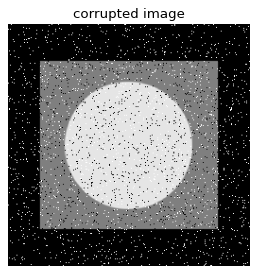

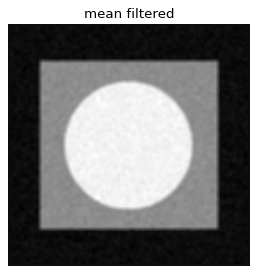

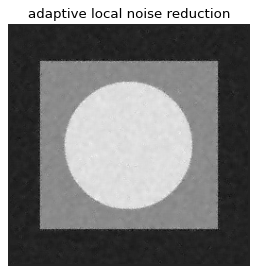

In [28]:
plt.figure(dpi=80)
plt.imshow(f_sp,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('corrupted image')
plt.show()
plt.figure(dpi=80)
plt.imshow(r_mean,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('mean filtered')
plt.show()
plt.figure(dpi=80)
plt.imshow(r_amean,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('adaptive local noise reduction')
plt.show()

- Salt and Pepper Noise

In [29]:
for x in range(ss,np.size(f_n,0)-ss):
  for y in range(ss,np.size(f_n,1)-ss):
    Sxy = f_sp[x-ss:x-ss+SS,y-ss:y-ss+SS]
    r_mean[x,y] = np.mean(Sxy)
    r_median[x,y] = np.median(Sxy)

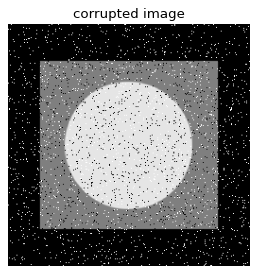

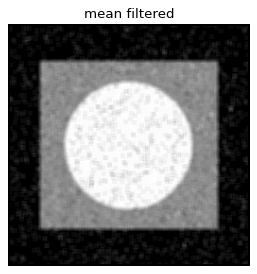

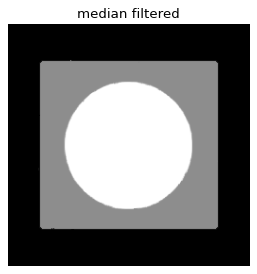

In [30]:
plt.figure(dpi=80)
plt.imshow(f_sp,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('corrupted image')
plt.show()
plt.figure(dpi=80)
plt.imshow(r_mean,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('mean filtered')
plt.show()
plt.figure(dpi=80)
plt.imshow(r_median,cmap='gray',aspect='equal')
plt.axis('off')
plt.title('median filtered')
plt.show()